In [1]:
import matplotlib 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helper import *
from tqdm import tqdm_notebook
import brainconn as bc
import pandas as pd
import seaborn as sns
import nilearn.plotting as plotting
import palettable as pal
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import scipy.stats as stats

In [2]:
conn_mat, labels, dist_mat, g_conn = load_marmoset_data()

In [3]:
disc_pal_4 = sns.color_palette("husl", 4)
cmap_seq2 = mcolors.LinearSegmentedColormap.from_list('',
                                                      pal.cmocean.sequential.Deep_20.mpl_colors[4:-4])

In [4]:
def plot_motif_freq():
    [motif3_f_arr, motif3_f_arr_zscore] = load_pickle_file('data/motifs_20181129_220228.pickle')
    net_motif3 = motif3_f_arr[0]

    net_motif3_freq = np.average(net_motif3, axis=1)
    net_motif3_freq /= np.sum(net_motif3_freq)

    net_motif3_freq_null = [np.average(_, axis=1) for _ in motif3_f_arr[1:]]
    net_motif3_freq_null = [_ / np.sum(_) for _ in net_motif3_freq_null]
    net_motif3_freq_null_mean = np.mean(net_motif3_freq_null, axis=0)

    p_sig_index = []
    for i in range(13):
        tmp_null = [_[i] for _ in net_motif3_freq_null]
        p_val_up = np.sum(np.array(tmp_null) > net_motif3_freq[i]) / len(tmp_null)
        p_val_down = np.sum(np.array(tmp_null) < net_motif3_freq[i]) / len(tmp_null)
        if p_val_up < 0.05 or p_val_down < 0.05:
            p_sig_index.append(i + 1)

    # get motif figures-3
    import matplotlib.image as mpimg
    motif3_img = mpimg.imread('data/journal.pbio.0020369.g001-1.png')
    # plt.imshow(motif3_img)
    motif3_img_each = []
    width, height = 300, 355
    base_x, base_y = 560, 110
    for i in range(4):
        for j in range(4):
            if i == 3 and j > 0: break
            curr_img = motif3_img[base_y + i * height:base_y + (i + 1) * height,
                       base_x + j * width:base_x + (j + 1) * width]
            motif3_img_each.append(curr_img)
            # plt.figure()
            # plt.imshow(curr_img)

    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    ax.bar(np.arange(1, 14), net_motif3_freq, width=0.4, color=disc_pal_4[-1])
    ax.boxplot(np.array(net_motif3_freq_null),
               notch=True, showbox=True, sym='.', widths=0.4,
               boxprops={'color': 'gray'}, capprops={'color': 'gray'},
               whiskerprops={'color': 'gray'}, medianprops={'color': 'gray'}, showfliers=False)
    # plt.plot(np.arange(1, 14), net_motif3_freq_null_mean,
    #          linestyle='-', color='gray',
    #          marker='*', markeredgecolor='gray', markerfacecolor='gray')
    plt.plot(p_sig_index, [0.3] * len(p_sig_index), linestyle='', marker='*', color=disc_pal_4[0])
    plt.ylabel('appearance frequency')
    xl, yl, xh, yh = np.array(ax.get_position()).ravel()
    x_add = 0.058
    img_size = 0.08
    for i in range(13):
        newax = fig.add_axes([xl + i * x_add, yl - 0.1, img_size, img_size])
        newax.imshow(motif3_img_each[i])
        newax.axis('off')
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=True, offset=10, trim=True)


In [5]:
[motif3_f_arr, motif3_f_arr_zscore] = load_pickle_file('data/motifs_20181129_220228.pickle')
net_motif3 = motif3_f_arr[0]

net_motif3_freq = np.average(net_motif3, axis=1)
net_motif3_freq /= np.sum(net_motif3_freq)

net_motif3_freq_null = [np.average(_, axis=1) for _ in motif3_f_arr[1:]]
net_motif3_freq_null = [_ / np.sum(_) for _ in net_motif3_freq_null]
net_motif3_freq_null_mean = np.mean(net_motif3_freq_null, axis=0)

p_sig_index = []
for i in range(13):
    tmp_null = [_[i] for _ in net_motif3_freq_null]
    p_val_up = np.sum(np.array(tmp_null) > net_motif3_freq[i]) / len(tmp_null)
    p_val_down = np.sum(np.array(tmp_null) < net_motif3_freq[i]) / len(tmp_null)
    if p_val_up < 0.05 or p_val_down < 0.05:
        p_sig_index.append(i + 1)


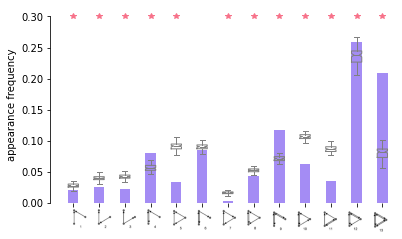

In [6]:
plot_motif_freq()